In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

## 1. Drawing Shapes

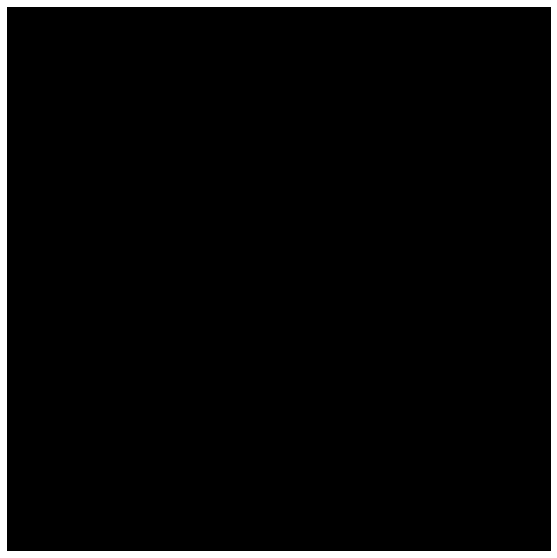

In [3]:
canvas = np.zeros((300, 300, 3), dtype="uint8")
show_image(canvas)

### 1.1 Drawing Lines

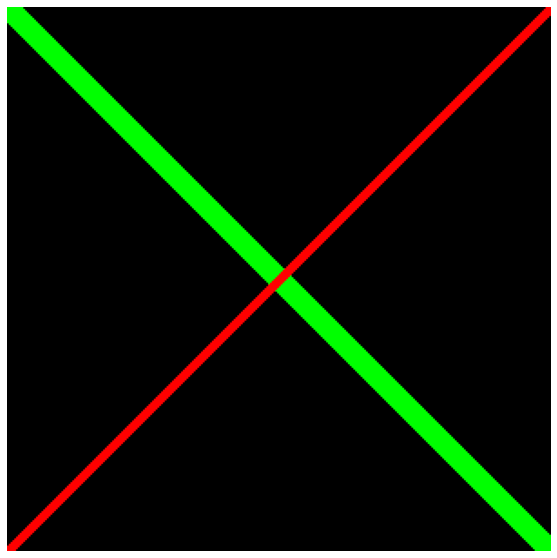

In [4]:
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green, 10)

red = (0, 0, 255)

cv2.line(canvas, (300, 0), (0, 300), red, 3)
show_image(np.flip(canvas, axis=2))

### 1.2 Drawing Rectangles

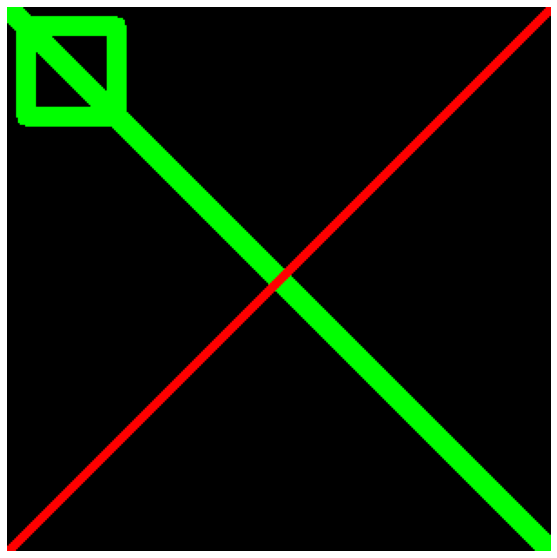

In [5]:
cv2.rectangle(canvas, (10, 10), (60, 60), green, 10)
show_image(np.flip(canvas, axis=2))

### 1.3 Drawing Circles

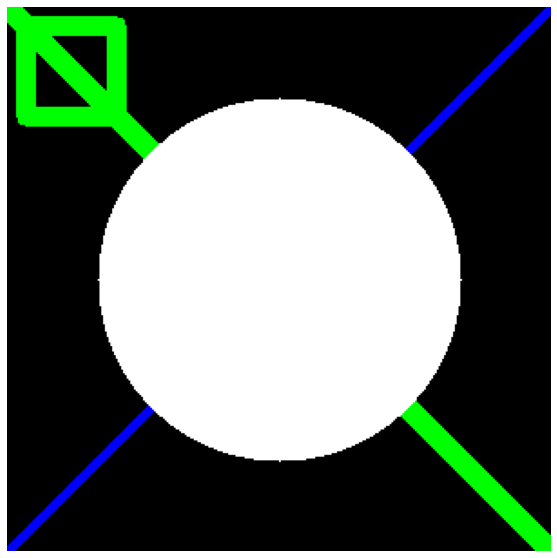

In [6]:
clone = canvas.copy()
white = (255, 255, 255)
radius = 100
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
cv2.circle(clone, (centerX, centerY), radius, white, -1)
show_image(clone)

### HOMEWORK: Draw Random shapes

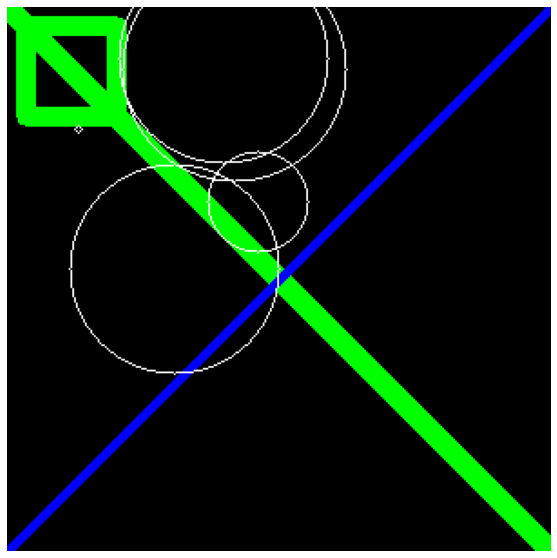

In [8]:
# TODO: Use a random number generator to draw random number of shapes in various sizes over the canvas
import random

clone = canvas.copy()
white = (255, 255, 255)
import random
for i in range(5):
    #centerX = random.choices(clone.shape[1] // 2)
    centerX = random.randint(0, clone.shape[1] // 2)
    centerY = random.randint(0, clone.shape[0] // 2)
    radios = random.randrange(0, clone.shape[0] // 4, 2)
    cv2.circle(clone, (centerX, centerY), radios, white)
show_image(clone)


## 2. Masks

### 2.1: Drawing Shape Masks

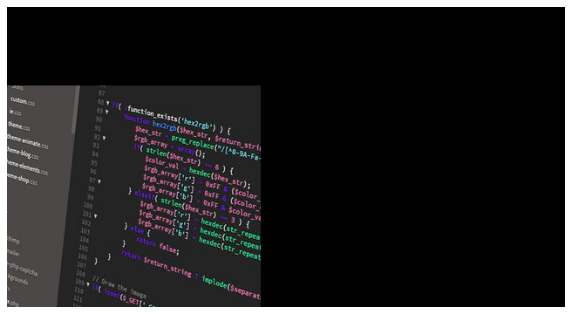

In [9]:
image = cv2.imread('../img/coding.png')
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)

masked = cv2.bitwise_and(image, image, mask=mask)
show_image(masked)

### 2.2: Extracting Objects from Images

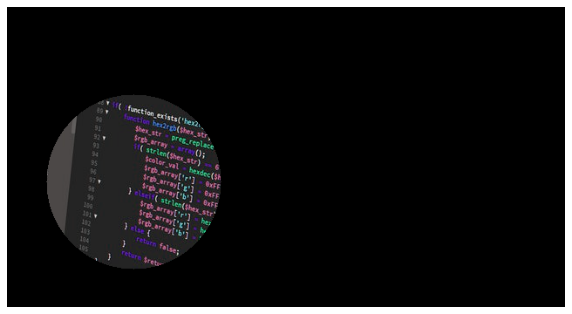

In [10]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)
show_image(masked)

### EXERCISE: Crop Out a muffin from this image using a rectangular mask

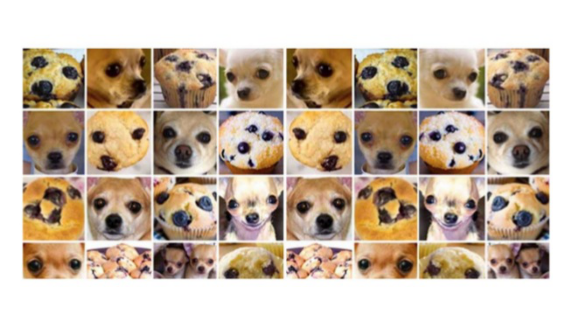

In [11]:
image = np.flip(cv2.imread('../img/dog_muffin.jpg'), axis=2)
show_image(image)

(Text(0.5, 1.0, 'Masked Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

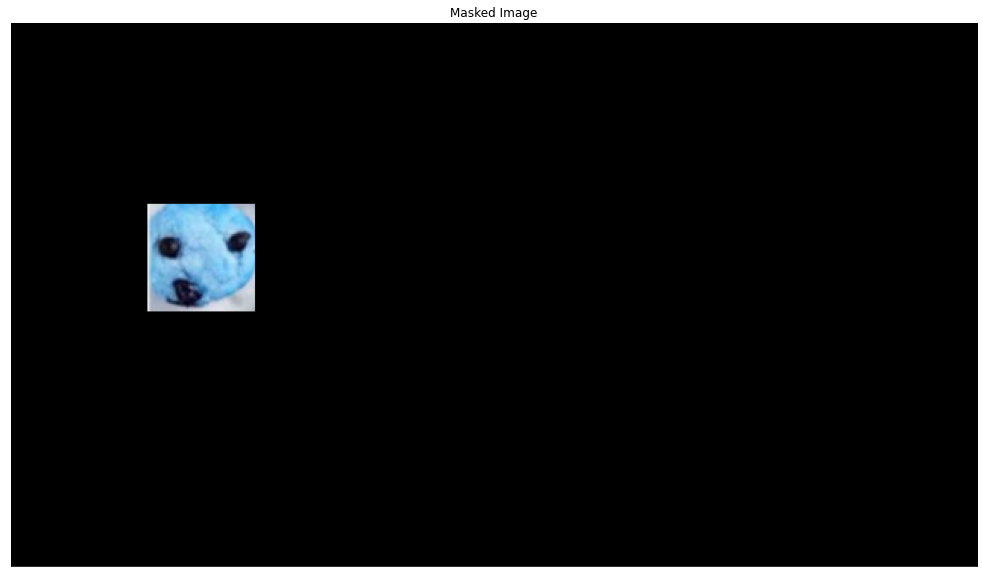

In [13]:
# %load ../solutions/dog_muffin.py


import cv2
import numpy as np
import matplotlib.pyplot as plt
image = np.flip(cv2.imread('../img/dog_muffin.jpg'), axis=2)
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (90, 120), (160, 190), 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)
#masked = np.flip(masked, axis=2)
plt.figure(figsize=(20, 10))
plt.imshow(np.flip(masked, axis =2))
plt.title('Masked Image'), plt.xticks([]), plt.yticks([])

## 3. Geometrical Transformations

### 3.1 Translation

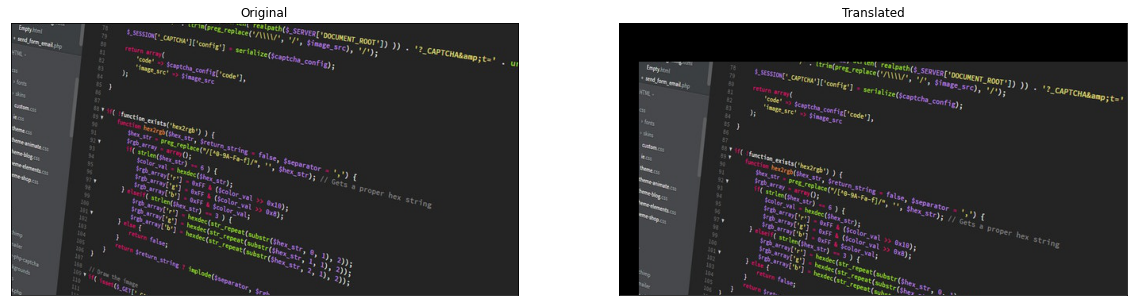

In [15]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(shifted)
plt.title('Translated'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.2 Rotation

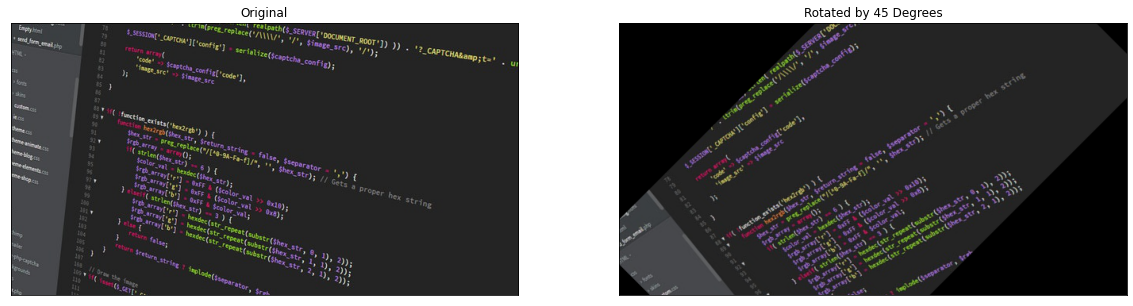

In [16]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)
(h, w) = image.shape[:2]
(cX, cY) = (w / 2, h / 2)

M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(rotated)
plt.title('Rotated by 45 Degrees'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.3 Scaling

(344, 640)


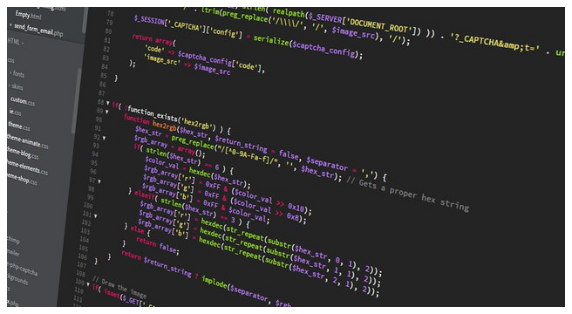

In [17]:
print(cv2.imread('../img/coding.png').shape[:2])
show_image(image)

Original shape: (344, 640, 3) vs Resized shape (688, 1280, 3)


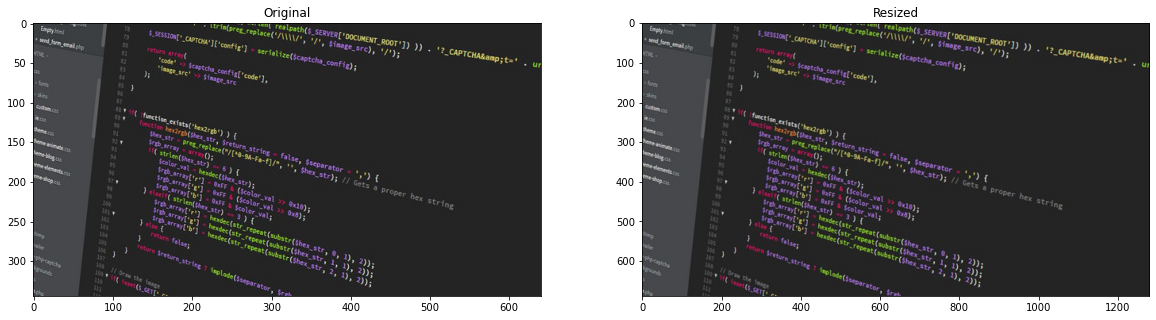

In [18]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)
height, width = image.shape[:2]
resized_width = 1280

# calculating ratio of new image to old image
ratio = resized_width / width
dim = (resized_width, int(height * ratio))

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

print(f'Original shape: {image.shape} vs Resized shape {resized.shape}')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1), plt.imshow(image) 
plt.title('Original')
plt.subplot(1,2,2), plt.imshow(resized)
plt.title('Resized')
plt.show()

Original shape: (344, 640, 3) vs Resized shape (688, 1280, 3)


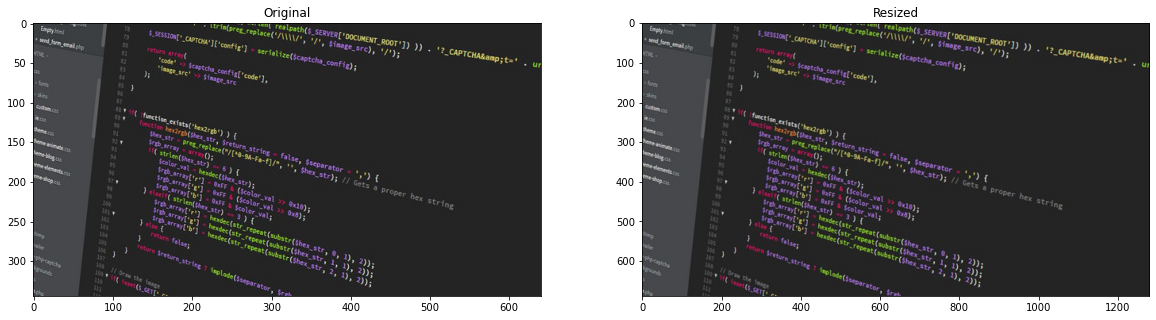

In [19]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)
height, width = image.shape[:2]
resized_height = 688

# calculating ratio of new image to old image
ratio = resized_height / height
dim = (int(width * ratio), resized_height)

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

print(f'Original shape: {image.shape} vs Resized shape {resized.shape}')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1), plt.imshow(image) 
plt.title('Original')
plt.subplot(1,2,2), plt.imshow(resized)
plt.title('Resized')
plt.show()

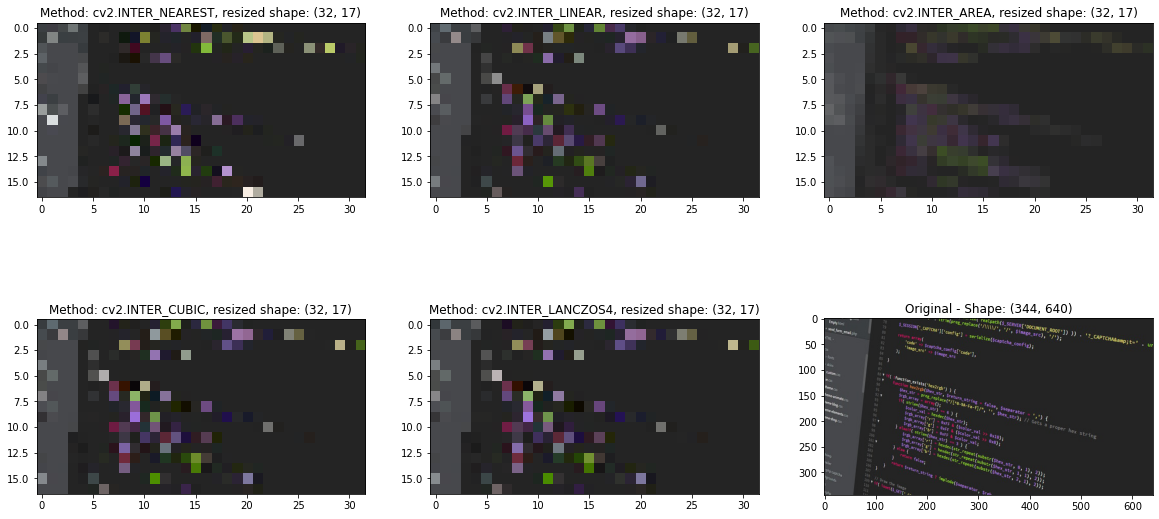

In [20]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)

# Resizing the image - Note, required dimension tuple can only accept integers (pixel locations)
# Note: Image shape must be reversed as order of width and height is different since we are flipping the image matrix above
resize_times = 0.05
dim = tuple(map(lambda x: int(x * resize_times), reversed(image.shape[:2])))

# construct the list of interpolation methods
methods = [
    ("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
    ("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
    ("cv2.INTER_AREA", cv2.INTER_AREA),
    ("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
    ("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]
 
plt.figure(figsize=(20,10))

# loop over the interpolation methods
for i, (name, method) in enumerate(methods):
    # increase the size of the image by 3x using the current interpolation method
    resized = cv2.resize(image, dim, interpolation=method)
    plt.subplot(2,3,i+1),plt.imshow(resized)
    plt.title(f'Method: {name}, resized shape: {dim}')

plt.subplot(2,3,6), plt.imshow(image) 
plt.title(f'Original - Shape: {image.shape[:2]}')
    
plt.show()

### 3.4 Flipping

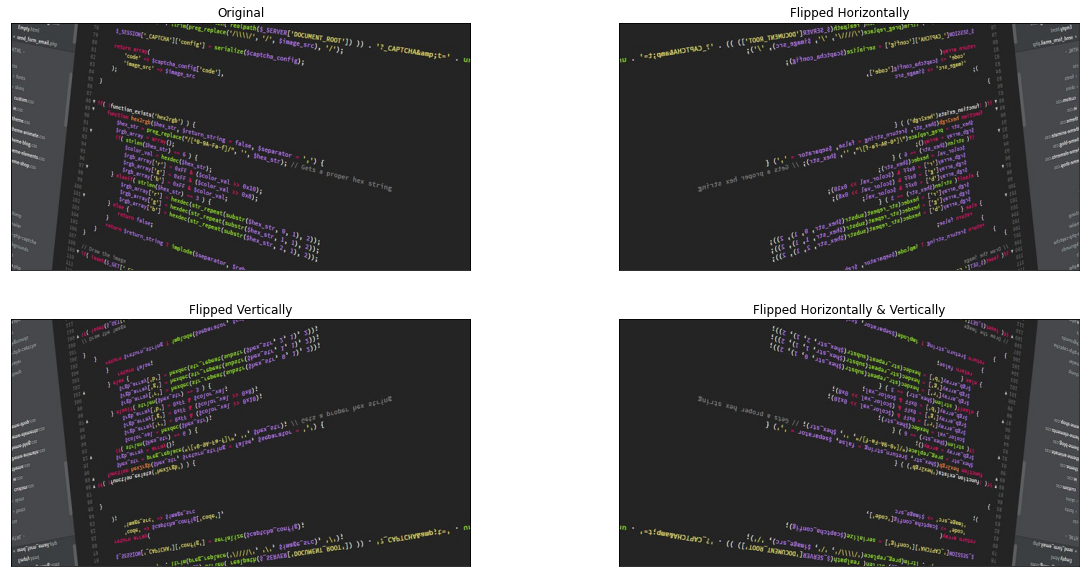

In [21]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)

# flip the image horizontally
hflipped = cv2.flip(image, 1)
 
# flip the image vertically
vflipped = cv2.flip(image, 0)
 
# flip the image along both axes
hvflipped = cv2.flip(image, -1)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(hflipped)
plt.title('Flipped Horizontally'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(vflipped)
plt.title('Flipped Vertically'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(hvflipped)
plt.title('Flipped Horizontally & Vertically'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.5 Cropping

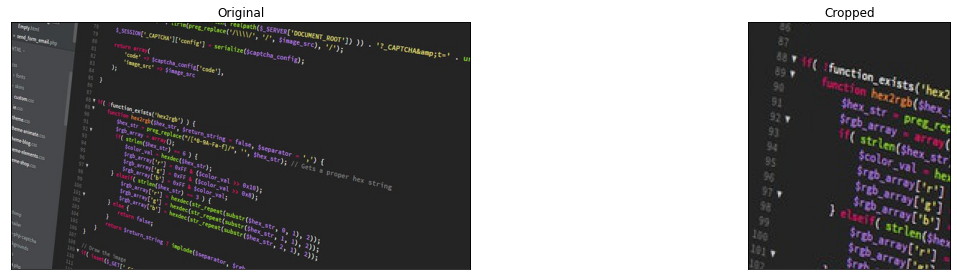

In [22]:
image = np.flip(cv2.imread('../img/coding.png'), axis =2)
cropped = image[85:250, 85:220]

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(cropped)
plt.title('Cropped'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.6 Image Arithmetic

Original [133 117 192], Added: [233 217 255]


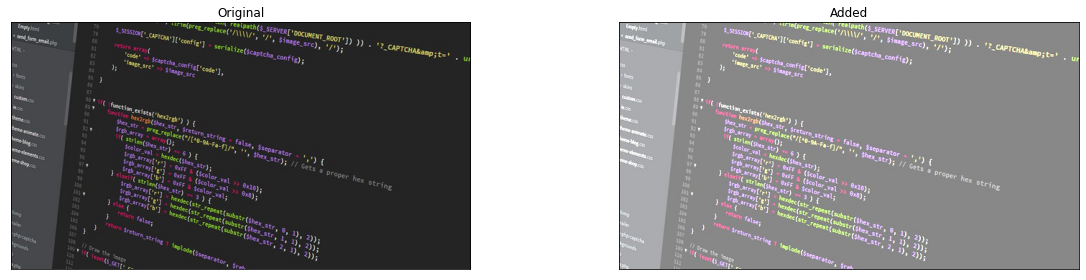

In [23]:
M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)
print(f'Original {image[150, 155]}, Added: {added[150, 155]}')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(added)
plt.title('Added'), plt.xticks([]), plt.yticks([])
plt.show()

Original [35 39 42], Substracted: [0 0 0]


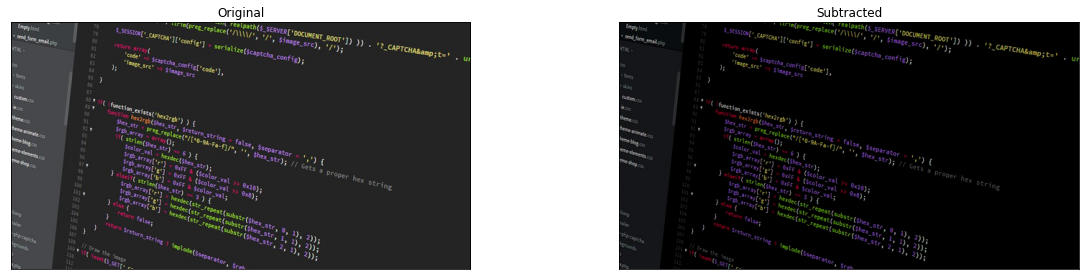

In [24]:
M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)
print(f'Original {image[10, 10]}, Substracted: {subtracted[10, 10]}')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(subtracted)
plt.title('Subtracted'), plt.xticks([]), plt.yticks([])
plt.show()

### 3.7 Bitwise Operations

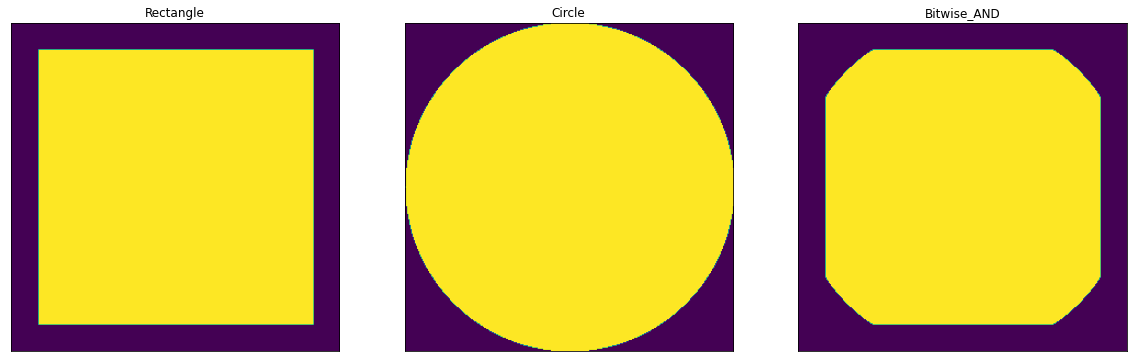

In [25]:
rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)

circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)

bitwise_and = cv2.bitwise_and(rectangle, circle)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1),plt.imshow(rectangle)
plt.title('Rectangle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(circle)
plt.title('Circle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bitwise_and)
plt.title('Bitwise_AND'), plt.xticks([]), plt.yticks([])
plt.show()

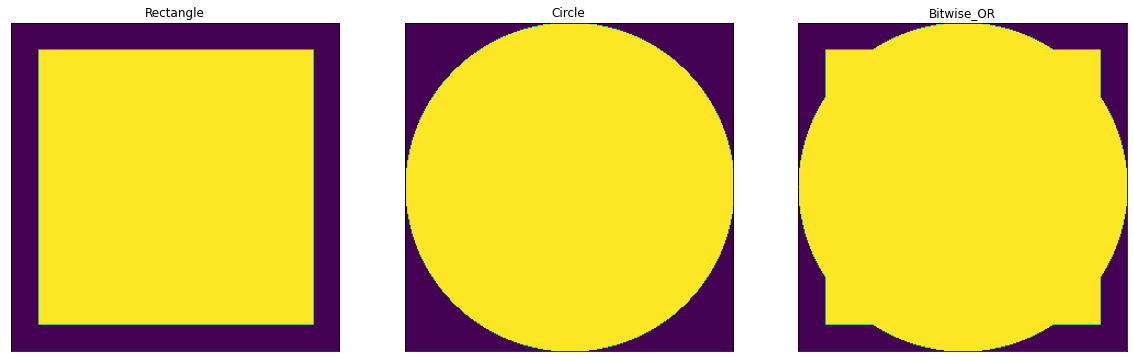

In [26]:
bitwise_or = cv2.bitwise_or(rectangle, circle)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1),plt.imshow(rectangle)
plt.title('Rectangle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(circle)
plt.title('Circle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bitwise_or)
plt.title('Bitwise_OR'), plt.xticks([]), plt.yticks([])
plt.show()

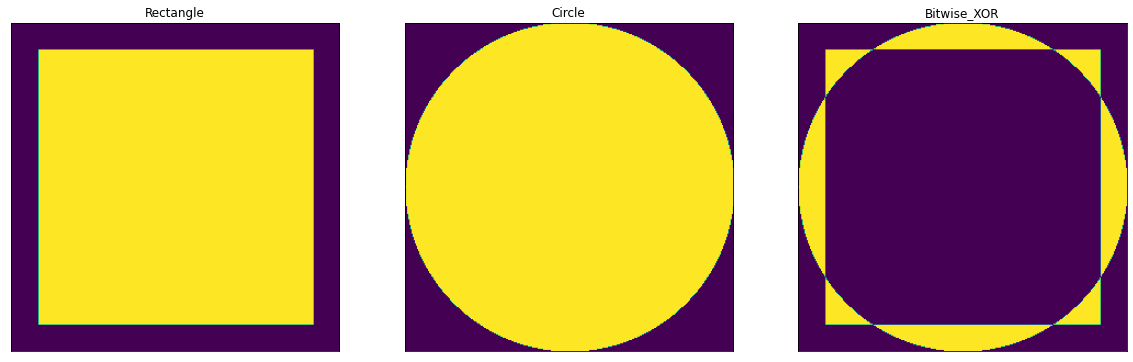

In [27]:
bitwise_xor = cv2.bitwise_xor(rectangle, circle)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1),plt.imshow(rectangle)
plt.title('Rectangle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(circle)
plt.title('Circle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bitwise_xor)
plt.title('Bitwise_XOR'), plt.xticks([]), plt.yticks([])
plt.show()

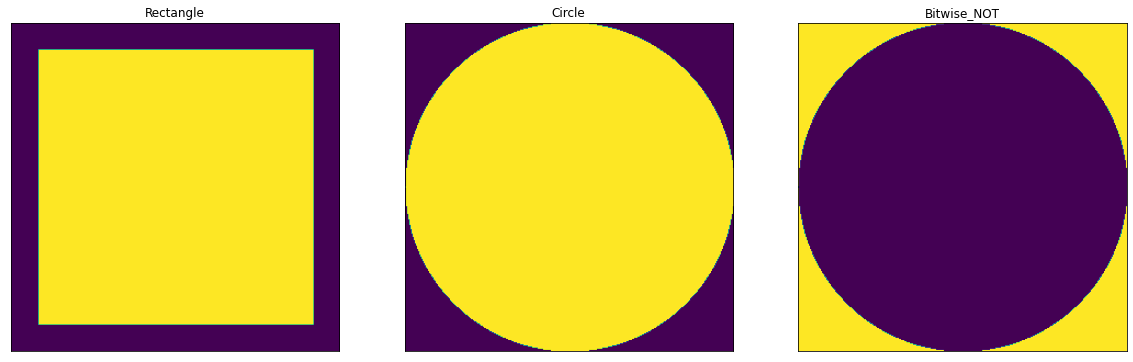

In [28]:
bitwise_not = cv2.bitwise_not(circle)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1),plt.imshow(rectangle)
plt.title('Rectangle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(circle)
plt.title('Circle'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bitwise_not)
plt.title('Bitwise_NOT'), plt.xticks([]), plt.yticks([])
plt.show()

### Homework: Complex Transformations - Apply multiple transformations at once on one image

C:\Users\attsa\.conda\envs\Computer Vision\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(<matplotlib.axes._subplots.AxesSubplot at 0x170c014bb48>,
 <matplotlib.image.AxesImage at 0x170bef66c88>)

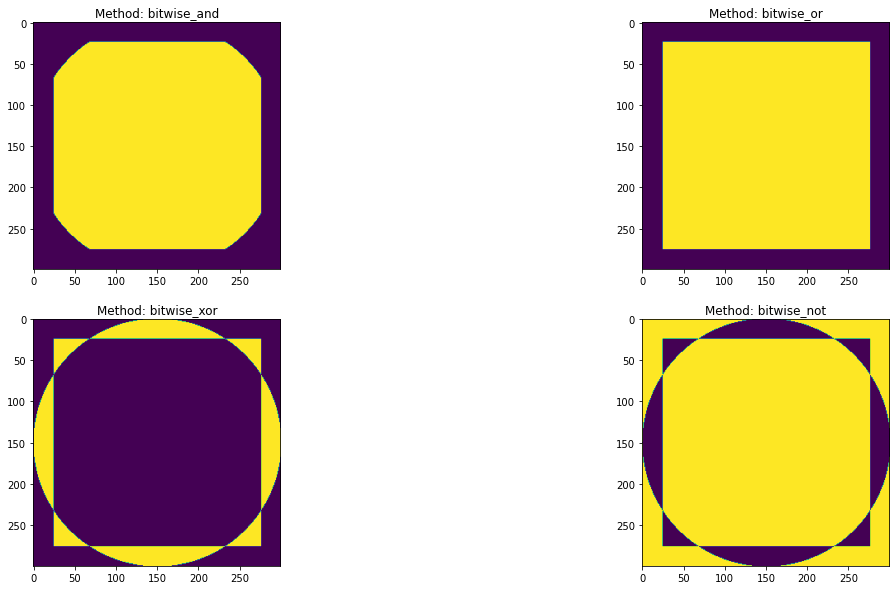

In [29]:
# TODO: Your code below

# construct the list of bit operation methods
methods = [
    "bitwise_and",
    "bitwise_or",
    "bitwise_xor",
    "bitwise_not"
    ]
plt.figure(figsize=(20,10))
# loop over the interpolation methods
for i, (name) in enumerate(methods):
    if name == "bitwise_and":
        result = cv2.bitwise_and(rectangle, circle)
    if name == "bitwise_or":
        result = cv2.bitwise_or(result, rectangle)
    if name == "bitwise_xor":
        result = cv2.bitwise_xor(result, circle)
    if name == "bitwise_not":
        result = cv2.bitwise_not(result)
    plt.subplot(2,2,i+1),plt.imshow(result)
    plt.title(f'Method: {name}')
plt.subplot(2,2,4), plt.imshow(result)


### PROJECT: Write a script that would take an image as input and produces 10 random new geometrically transformed images.

Text(0.5, 1.0, 'Original - Shape: (344, 640)')

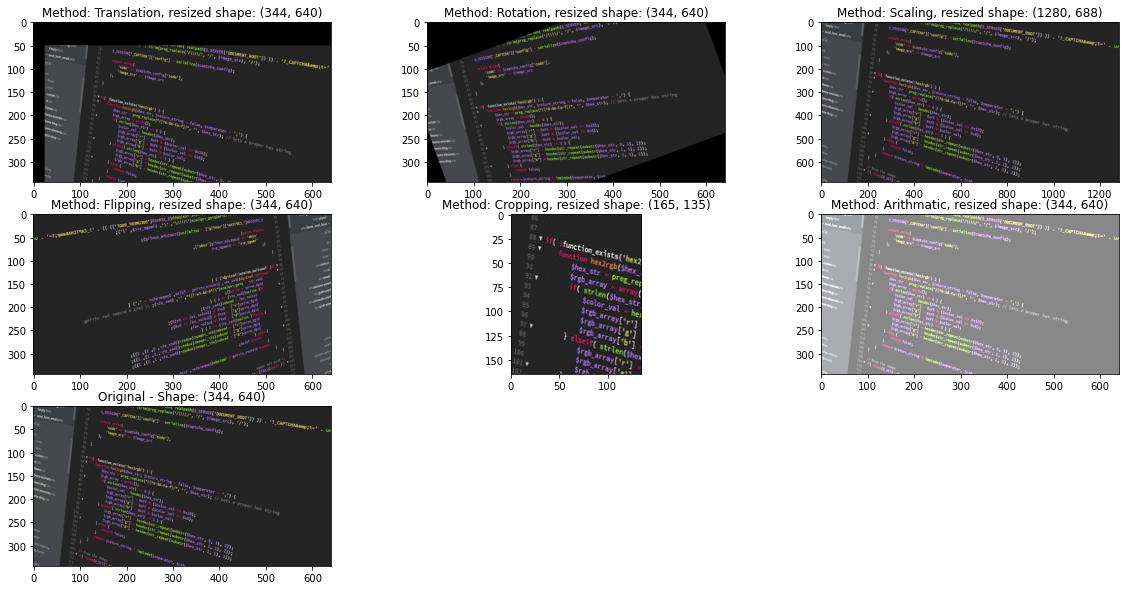

In [32]:
# TODO: Your code below

# construct the list of transfromation methods
methods = [
    "Translation",
    "Rotation",
    "Scaling",
    "Flipping",
    "Cropping",
    "Arithmatic"
    ]
plt.figure(figsize=(20,10))
# loop over the interpolation methods
for i, (name) in enumerate(methods):
    image = np.flip(cv2.imread('../img/coding.png'), axis =2)
    if name == "Translation":
        M = np.float32([[1, 0, 25], [0, 1, 50]])
        shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
        height, width = shifted.shape[:2]
        dim = (height, width)
        result = shifted
    if name == "Rotation":
        (h, w) = image.shape[:2]
        (cX, cY) = (w / 2, h / 2)
        M = cv2.getRotationMatrix2D((cX, cY), 20, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h))
        height, width = shifted.shape[:2]
        dim = (height, width)
        result = rotated
    if name == "Scaling":
        height, width = image.shape[:2]
        resized_width = 1280
        # calculating ratio of new image to old image
        ratio = resized_width / width
        dim = (resized_width, int(height * ratio))
        resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
        result = resized
    if name == "Flipping":
        # flip the image horizontally
        hflipped = cv2.flip(image, 1)
        height, width = hflipped.shape[:2]
        dim = (height, width)
        result = hflipped
    if name == "Cropping":
        cropped = image[85:250, 85:220]
        height, width = cropped.shape[:2]
        dim = (height, width)
        result = cropped
    if name == "Arithmatic":
        M = np.ones(image.shape, dtype = "uint8") * 100
        added = cv2.add(image, M)
        height, width = added.shape[:2]
        dim = (height, width)
        result = added
    plt.subplot(3,3,i+1),plt.imshow(result)
    plt.title(f'Method: {name}, resized shape: {dim}')
plt.subplot(3,3,7), plt.imshow(image)
plt.title(f'Original - Shape: {image.shape[:2]}')
